In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = sns.load_dataset("titanic")
titanic.to_csv('../data2/titanic.csv', index=False)

데이터 전처리 - 결측치
age: 중앙값 치환
embarked, embark_town : 최빈값
deck : 최빈 category


In [3]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
titanic['age']=titanic['age'].fillna(titanic['age'].median())
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

최빈값 확인

In [5]:
titanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

최빈값인 S로 치환

In [6]:
titanic['embarked']=titanic['embarked'].fillna('S')
titanic['embarked'].value_counts()


embarked
S    646
C    168
Q     77
Name: count, dtype: int64

최빈값 확인

In [7]:
titanic['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

최빈값 치환

In [8]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')
titanic['embark_town'].value_counts()


embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [9]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

최빈값 확인

In [10]:
titanic['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [11]:
titanic['deck']=titanic['deck'].fillna('C')
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

데이터 탐색

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


생존자 수 확인

In [13]:
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

차트 그리기

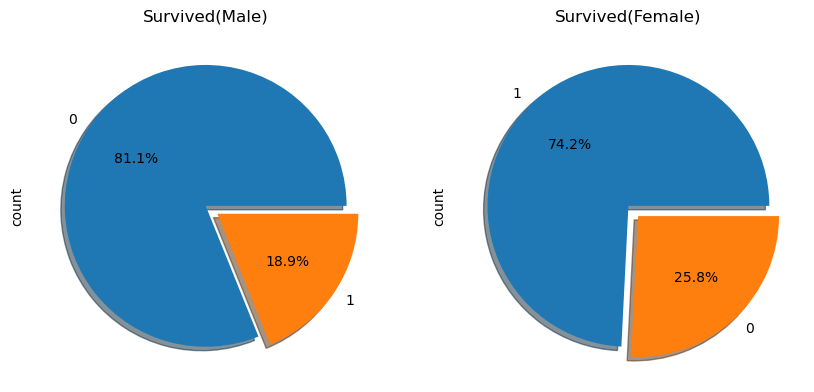

In [19]:
f,ax=plt.subplots(1,2, figsize=(10,5))
titanic['survived'][titanic['sex']=='male'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax= ax[0], shadow=True)
titanic['survived'][titanic['sex']=='female'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax= ax[1], shadow=True)
ax[0].set_title('Survived(Male)')
ax[1].set_title('Survived(Female)')
plt.show()

객실 등급별 생존자 수 차트로 나타내기

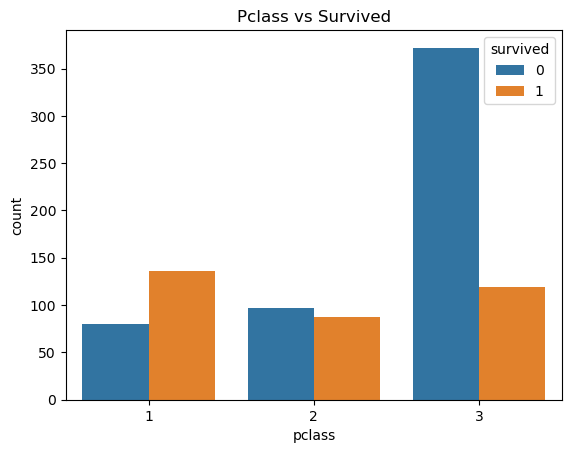

In [20]:
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Pclass vs Survived')
plt.show()

데이터 모델링을 해보자.

상관 분석을 위한 상관 계수를 구해 저장하기

int, float, boolean인 것만 추출해서 titanic2에 저장하고 구조 출력해.
자료형이 숫자 형태인 8개 속성만 추출된 것을 확인

In [21]:
titanic2= titanic.select_dtypes(include=[int, float, bool])
titanic2.shape

(891, 8)

In [22]:
titanic_corr = titanic2.corr(method = 'pearson')
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


피어슨으로 상관계수 구함.
csv로 저장하자.

In [26]:
titanic_corr.to_csv('../data2/titanic_corr.csv', index=False)


상관계수 확인하기
파일 열어보면 남자성인, 객실 등급 생존과 음의 상관관계를 보여줌.
객실 요금은 양의 상관관계
동행없이 혼자 탑승한 경우 생존율이 떨어짐

특정 변수간의 상관계수 구하기

In [27]:
titanic['survived'].corr(titanic['adult_male'])


np.float64(-0.5570800422053258)

In [28]:
titanic['survived'].corr(titanic['fare'])

np.float64(0.25730652238496227)

결과 시각화 산점도로 상관 분석 시각화 하기
종속변수를 hue로 지정.

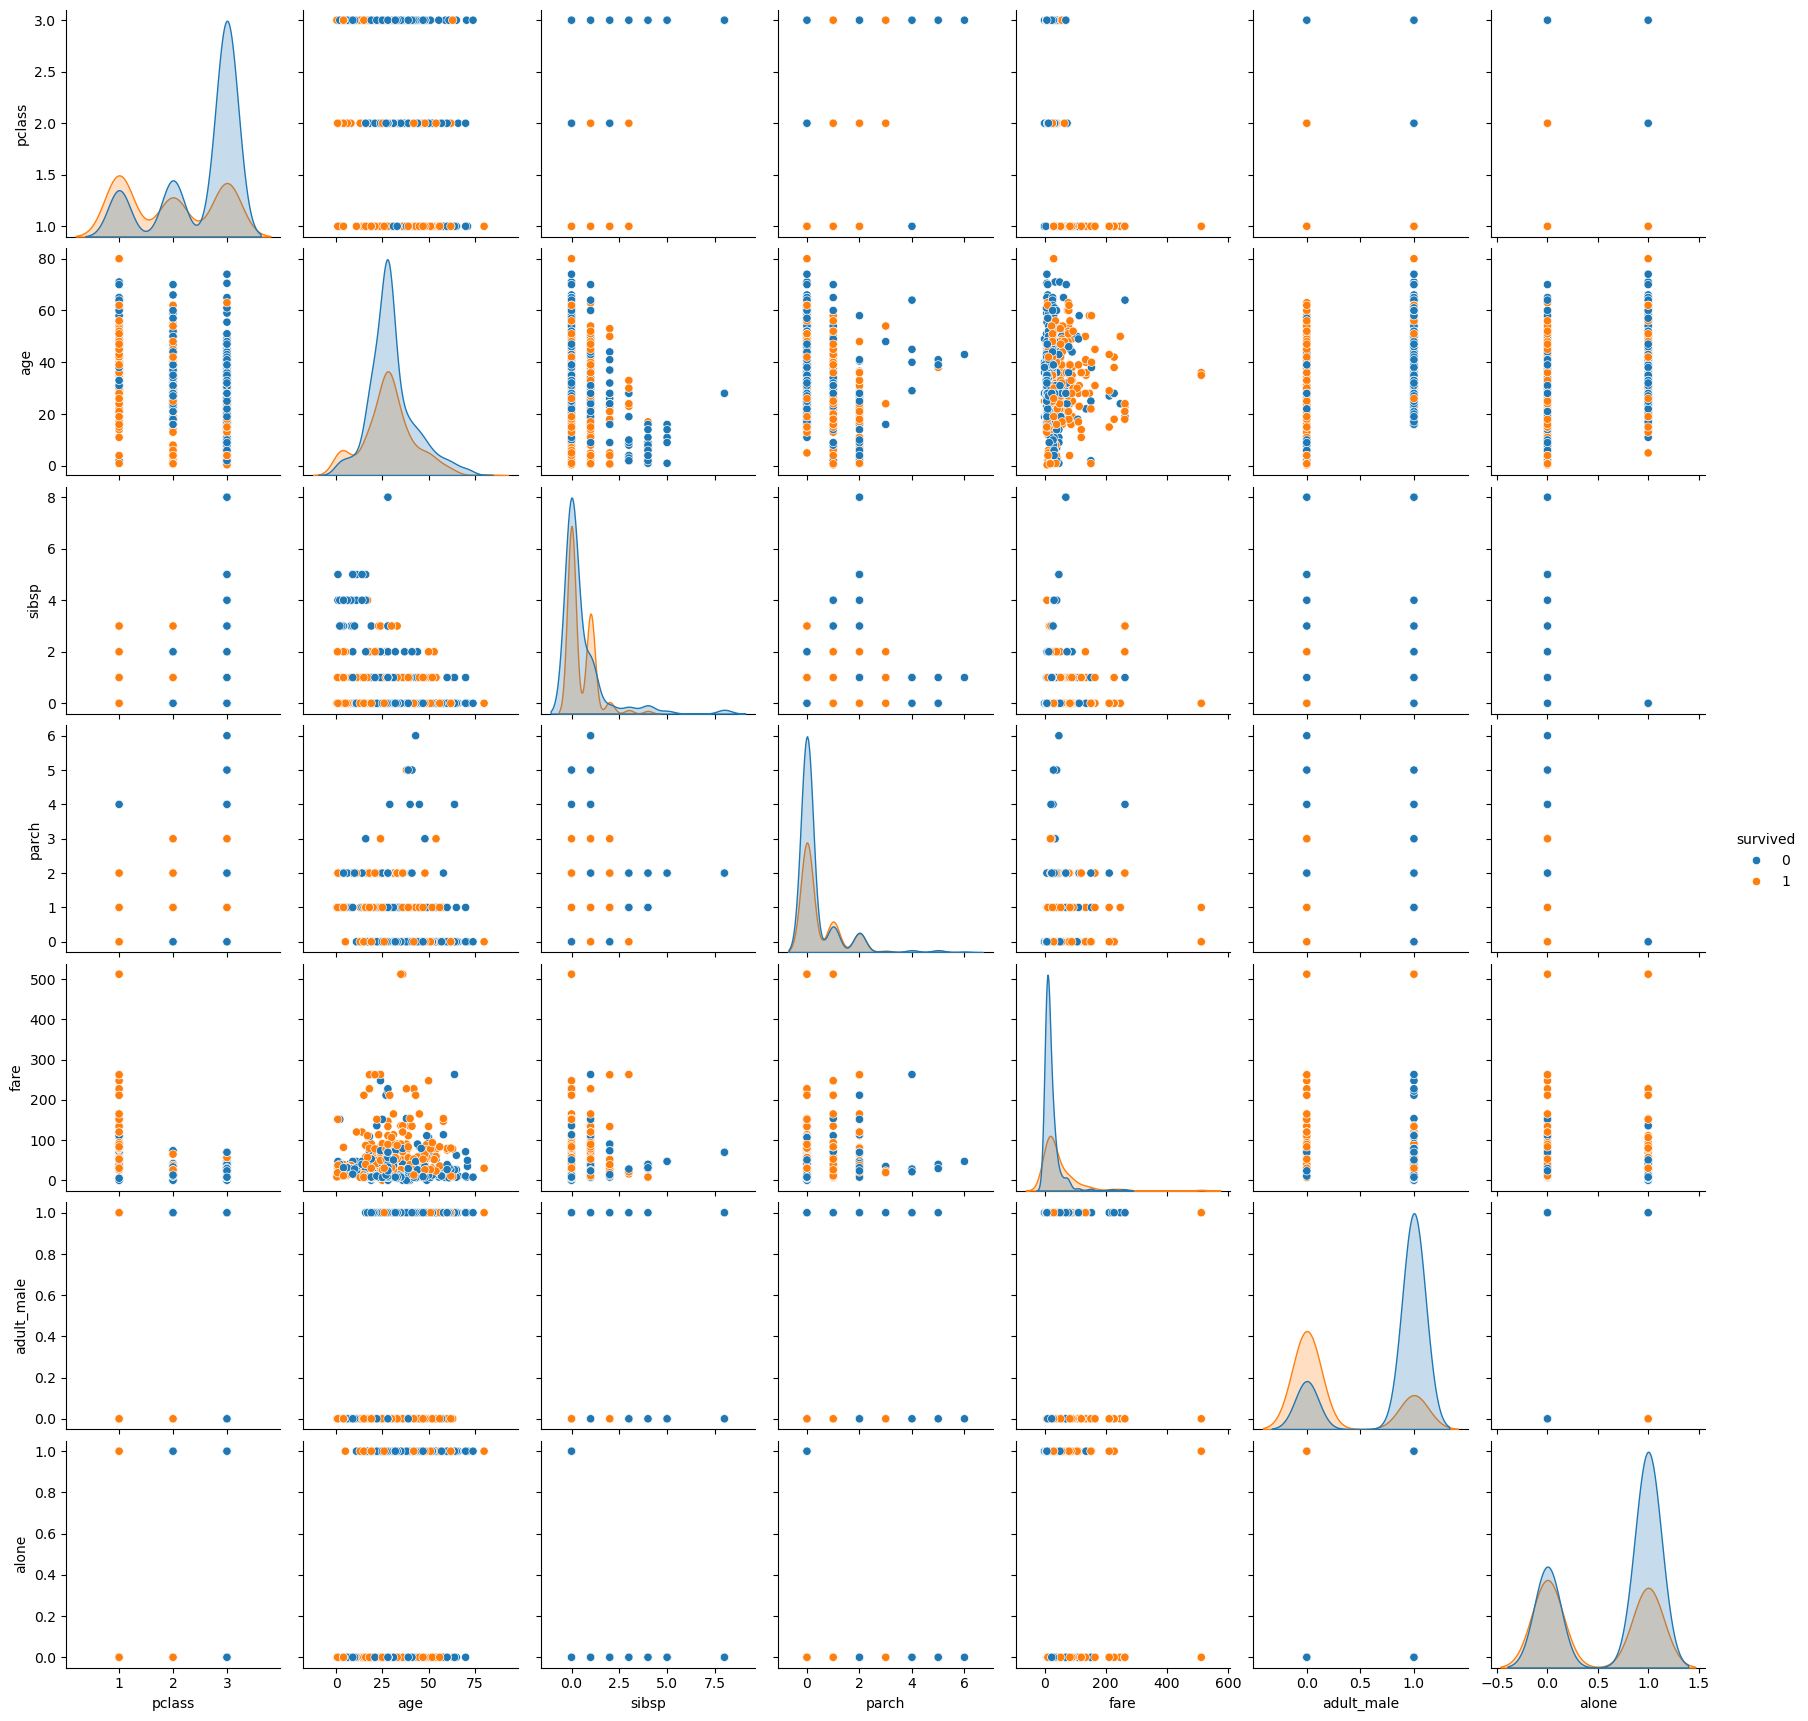

In [30]:
sns.pairplot(titanic, hue='survived')
plt.show()

두 변수간의 상관관계 시각화

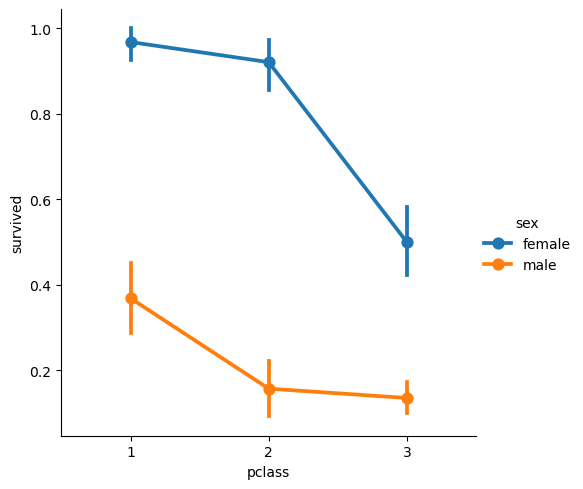

In [31]:
sns.catplot(x='pclass', y='survived', hue='sex', data=titanic, kind='point')
plt.show()

변수 사이의 상관계수를 히트맵으로 시각화

In [37]:
titanic[['sibsp', 'parch', 'family']].head()

,sibsp,parch,family
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [ ]:
def category_age(x):
  if x<10:
    return 0
  elif x<20:
    return 1
  elif x<30:
    return 2
  elif x<40:
    return 3
  elif x<50:
    return 4
  elif x<60:
    return 5
  elif x<70:
    return 6
  else:
    return 7
 #10세 단위로 등급을 나눠서 0~7 값으로 category_age만들고 age2열에 추가
titanic['age2'] = titanic['age'].apply(category_age)
#성별을 0/1로 치환
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0}) 
#가족 수를 구하여 family 열을 추가
titanic['family'] = titanic['sibsp']+titanic['parch']+1
# 가족 수 = 나 자신(1) + 형제/배우자 + 부모/자식
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
0,0,3,NaN,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,2
1,1,1,NaN,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,2
2,1,3,NaN,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2,1
3,1,1,NaN,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,2
4,0,3,NaN,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,1


titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1 코드 해석
titanic은 표(DF)임.
family는 sibsp 컬럼 전체 + parch 컬럼 전체 가지고 오는 것.
pandas는 행끼리 자동으로 더해줘서 sibsp 1 + parch 2 = 3, family가 되는 것 + 1은 자기 자신
family라는 파생 변수를 만든거야.

수정된 테이블을 저장

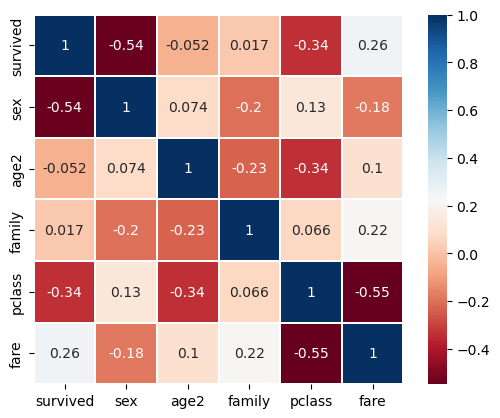

In [ ]:
titanic.to_csv('../data2/titanic2.csv', index=False)
heatmap_data=titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]
colormap=plt.cm.RdBu
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size":10})
plt.show()